## LIVE: Dimensionality Reduction
[ AppliedAICourse.com ]

**Pre-requisites:**
-  Three chapters @ AppliedAICourse starting from this video: https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2878/what-is-dimensionality-reduction/2/module-2-data-science-exploratory-data-analysis-and-data-visualization

- Chapter names:
  1. Dimensionality reduction and Visualization
  2. PCA(Principal Component Analysis)
  3.  (t-SNE)T-distributed Stochastic Neighbourhood Embedding

**Agenda:**
- Code walk-through of 
  - Dataset loading
  - Colab + GDrive
  - PCA
  - tSNE
- Introduce Scikit-Learn, OpenCV
- No theory, as it is already covered in the course videos.
- Key ingredients: Google + References + Basics of Python + Experiment + lots-of-patience + Check all inputs and outputs


### Data Matrix: 
- Load + Preprocess-operations
- Face-Dataset: 
  - http://vis-www.cs.umass.edu/lfw/
  - Download: http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
- Download + Unzip + Upload to Drive to be used with Colab.


**lfw_funneled**:
- Download + Unzip
- "ls" to list folders
- some folders like George_W_Bush have more iamges and others have too few.
- http://vis-www.cs.umass.edu/lfw/#information
  - 13233 images
  - 5749 people
  - 1680 people with two or more images
- Idea: Let us only retain a few folders which have atleast 100 images per person/folder.
- Code on your laptop to remove folders with <100 images
- Upload foldes with >= 100 images to GDrive to save bandwidth


In [4]:
# DONOT RUN this cell 
# RUN IT ON YOUR COMPUTER to remove folder with < 100 images
import os
import shutil


directory = r'/home/raghav/Downloads/lfw_funneled/'

#Google "For each file in a directory Python" ---> https://www.newbedev.com/python/howto/how-to-iterate-over-files-in-a-given-directory/

for subfolder in os.listdir(directory):
    if os.path.isdir(directory+subfolder): #Google "IS direcotry or file Python" ----> https://pythonexamples.org/python-check-if-path-is-file-or-directory/
    	# print(subfolder)
    	# Google "number of files in a folder python " ----->https://stackoverflow.com/questions/2632205/how-to-count-the-number-of-files-in-a-directory-using-python
    	l =len(os.listdir(directory+subfolder)) 
    	if l < 100:
    		# Google: " Deletedirectory Python" --->https://linuxize.com/post/python-delete-files-and-directories/#deleting-directories-folders(directory+subfolder)
    		shutil.rmtree(directory+subfolder)
    	else:
    		print(subfolder + str(l))

FileNotFoundError: [Errno 2] No such file or directory: '/home/raghav/Downloads/lfw_funneled/'

 ***Uplaod 1153 files in 5 folders to GDrive. Ignore the txt files.***

**How to prevent Google Colab from disconnecting ?**

- https://medium.com/@shivamrawat_756/how-to-prevent-google-colab-from-disconnecting-717b88a128c0
- Easy to follow steps.



In [5]:
# 1. Load data into Colab from Drive

# 1.1 Mount the google drive
# Tutorial: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA
from google.colab import drive
drive.mount('/content/gdrive/')

# If you have too many files/folder in your drive at the top-level, you may encounter:
# ValueError: mount failed: timeout during initial read of root folder; for more info: https://research.google.com/colaboratory/faq.html#drive-timeout

# Organize your drive into few key folders at the top-level to avoid timeout errors

ModuleNotFoundError: No module named 'google'

In [ ]:
# 1.2 Subfolder Paths

## See the files section in the side-window and figure out the folders/files

! pwd
! ls /content/gdrive/My\ Drive/


/content
 103ACC.pdf
'blending - Line chart 2.gsheet'
'Book_Contributor_EN (Limited) v1.1 (002) (2).gdoc'
'B.Tech Project 2'
 Classroom
'Colab Notebooks'
'Consent_icsadl (1).docx'
'Consent_icsadl (1).gdoc'
 Consent_icsadl.docx
 Consent_icsadl.gdoc
'Dunnhumby Documents'
'FInal Project.gdoc'
'Google Keep Document.gdoc'
 Image.jpg
 internship.pdf
'mphrx certificate.pdf'
'NEURAL NETWORK.gdoc'
'online reference material (1).gdoc'
'online reference material.gdoc'
'payment proof.gdoc'
'payment proof.pdf'
 Raghav_Experience_Certificate_K12.pdf
'Registration proof ICRIC.gdoc'
'report doc.gdoc'
'Resume (1).gdoc'
'Resume (1).pdf'
 Resume.gdoc
 Resume.pdf
'Rishikesh Photos'
'SCOPUS PROOF.gdoc'
'SCOPUS PROOF ICRIC.gdoc'
 Screenshot_20200313-183104.jpg
 SNA.pdf
 sqlify-result-a73529537cc34.csv
'Study of blending.gdoc'
'Twitter Bot Detection using Stacked Generalization Ensemble .gdoc'
 twitter.pdf
'Untitled document.gdoc'


In [6]:
# 1.3 Python code to list files and folders
# Same code snippets/functions as in code executed on your computer above.

import os
directory = r'/home/raghav/appliedai/module_2/data/lfw_funneled'
cnt = 0

for subfolder in os.listdir(directory):
  p = os.path.join(directory, subfolder)
  
  if os.path.isdir(p):
    
    print(p)
    print("****************************")

    for f in os.listdir(p):
      if f.endswith(".jpg"):
        fname = p + "/" + f
        # print(fname)
        cnt += 1
print(cnt)

/home/raghav/appliedai/module_2/data/lfw_funneled/Colin_Powell
****************************
/home/raghav/appliedai/module_2/data/lfw_funneled/Tony_Blair
****************************
/home/raghav/appliedai/module_2/data/lfw_funneled/Gerhard_Schroeder
****************************
/home/raghav/appliedai/module_2/data/lfw_funneled/Donald_Rumsfeld
****************************
/home/raghav/appliedai/module_2/data/lfw_funneled/George_W_Bush
****************************
1140


<class 'numpy.ndarray'>
(250, 250)


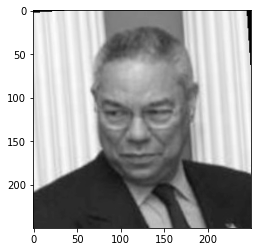

(1, 62500)


In [7]:
#1.4 Load one image & reshape into a vector

# Google "read image in opencv python " ---> https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html

import cv2 # opencv python
import numpy as np


# load the image
# Load an color image in grayscale
# Refer:https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html?highlight=imread#imread
im = cv2.imread('/home/raghav/appliedai/module_2/data/lfw_funneled/Colin_Powell/Colin_Powell_0050.jpg',0)

print(type(im))
print(im.shape)

# show the image using MatPlotLib (seen earlier)
import matplotlib.pyplot as plt


plt.imshow(im, cmap=plt.get_cmap('gray'))
plt.show()

# reshape im to a vector
d = 62500 # dim of each image
imVec = np.reshape(im,(1,d)) # row-vector 1 X 62500
print(imVec.shape) 


In [8]:
# Make a function out of it
def loadImage(fileName):
  # load the image
  # Load an color image in grayscale
  # Refer:https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html?highlight=imread#imread
  im = cv2.imread(fileName,0)

  # reshape im to a vector
  d = 62500 # dim of each image
  imVec = np.reshape(im,(1,d)) # row-vector 1 X 62500
  return imVec


In [9]:
# 1.5 Build a Data-Matrix with each row as an image
n = 1140
d = 62500

data = np.zeros((n,d))

index_file = dict(); # store ampping from row-index to filename

labels = [] # one unique number for all images in  each folder 

# Reusing the code above to ietarte through each folder and image
import os
directory = r'/home/raghav/appliedai/module_2/data/lfw_funneled'

i=0
folderNum=-1;

for subfolder in os.listdir(directory): # for each folder
  p = os.path.join(directory, subfolder)
  
  if os.path.isdir(p): # check for subfolders
    folderNum += 1;

    for f in os.listdir(p):
      
      if f.endswith(".jpg"): # check for image files
        fname = p + "/" + f
        
        data[i,:] = loadImage(fname) 
        index_file[i] = fname
        labels.append(folderNum)
        
        i += 1


print(i-1)
print(index_file.get(i-1))
print(labels[i-1])
# takes time as it has to load each iamge from disk and put it into memory


1139
/home/raghav/appliedai/module_2/data/lfw_funneled/George_W_Bush/George_W_Bush_0168.jpg
4


(1140, 62500)
255.0
0.0
82.896512


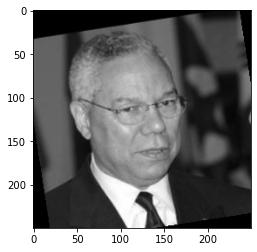

/home/raghav/appliedai/module_2/data/lfw_funneled/Colin_Powell/Colin_Powell_0028.jpg


In [10]:
print(data.shape)

# 1.6 sanity checks
print(np.max(data[10,:]))
print(np.min(data[10,:]))
print(np.mean(data[10,:]))

# thorough sanity checks to mkse sure everything is alright
tmp = data[10,:].reshape((250,250))

plt.imshow(tmp, cmap=plt.get_cmap('gray'))
plt.show()

print(index_file[10])


In [ ]:
# Let us store the data and index_file to drive so that we can load them directly
# Pickle Files

import pickle
# Google "read and write pickle files" ---> https://wiki.python.org/moin/UsingPickle

fName = directory + "data.pkl"
pickle.dump( data, open( fName, "wb" ) )

fName = directory + "index_file.pkl"
pickle.dump( index_file, open( fName, "wb" ) )

# See in the drive folders

# read pkl file back
index_file_pkl = pickle.load( open( fName, "rb" ) )
print(index_file_pkl)
print(index_file)


# Unmounting: https://colab.research.google.com/notebooks/io.ipynb
# drive.flush_and_unmount()

{0: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0056.jpg', 1: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0095.jpg', 2: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0081.jpg', 3: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0042.jpg', 4: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0109.jpg', 5: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0043.jpg', 6: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0080.jpg', 7: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0057.jpg', 8: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0082.jpg', 9: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0041.jpg', 10: '/content/gdrive/My Drive/lfw_funneled/Gerhard_Schroeder/Gerhard_Schroeder_0069.jpg', 11: '/content/gdriv

### Scikit-Learn: PCA
- We will cover step by step and build slowly.
- Key ingredients: Google + References + Basics of Python + Experiment + lots-of-patience + Check all inputs and outputs
-  User-Guides: https://scikit-learn.org/stable/user_guide.html
- API: https://scikit-learn.org/stable/modules/classes.html
- Every library has a unique way of performing its operations. You just have to get used to it.

- Google "SKlearn PCA" ---> https://scikit-learn.org/stable/modules/classes.html

- Indepth reading: https://scikit-learn.org/stable/modules/classes.html + examples on the page



(1140, 62500)


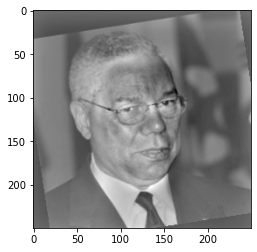

In [11]:
# data-preprocess: mean centering +  variance scaling for each featrue
# Wiki for PCA: "PCA can be done by eigenvalue decomposition of a data covariance (or correlation) 
# matrix or singular value decomposition of a data matrix, usually after a normalization 
# step of the initial data. The normalization of each attribute consists of mean centering – 
# subtracting each data value from its variable's measured mean so that its empirical mean (average) is zero.
# Some fields, in addition to normalizing the mean, do so for each variable's variance (to make it equal to 1)"

from sklearn import preprocessing
data_scaled = preprocessing.scale(data) #normalization
print(data_scaled.shape)

# viz a standarized image
tmp = data_scaled[10,:].reshape((250,250))
plt.imshow(tmp, cmap=plt.get_cmap('gray'))
plt.show()

In [12]:
from sklearn.decomposition import PCA
import time
pca = PCA(n_components = 50)

start_time = time.time()
pca.fit(data_scaled)
end_time = time.time()

print(end_time-start_time)

print(pca)

5.165452241897583
PCA(n_components=50)


[0.21713431 0.05384902 0.04816181 0.04572267 0.03917343 0.03871815
 0.03189486 0.02045846 0.01826238 0.0180453  0.01678775 0.01428113
 0.01254732 0.01148397 0.01129665 0.00994886 0.00977472 0.00889636
 0.00817784 0.00761779 0.00730427 0.00676213 0.00647152 0.00614104
 0.00595264 0.00523409 0.0050723  0.00473982 0.00452975 0.00441783
 0.00434672 0.00418261 0.00398498 0.00372954 0.00364069 0.00355437
 0.00344771 0.00334375 0.00325475 0.00310729 0.00299535 0.00287561
 0.00278483 0.0027057  0.0026508  0.00255503 0.00254064 0.00248831
 0.00241753 0.00239464]


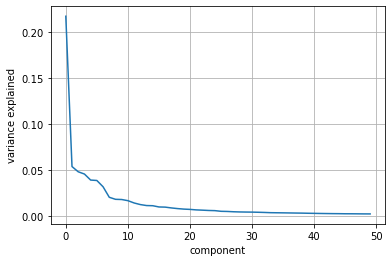

In [13]:
print(pca.explained_variance_ratio_) 

import seaborn as sns

plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('component')
plt.ylabel('variance explained')
plt.show()


(50, 62500)


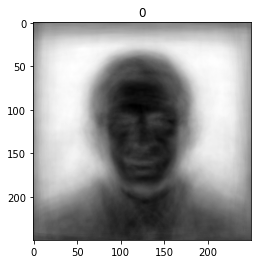

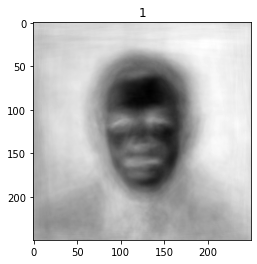

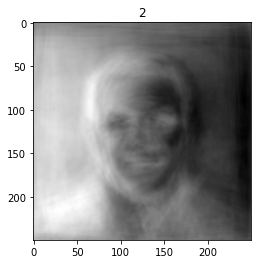

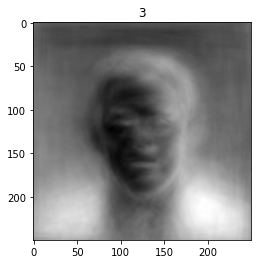

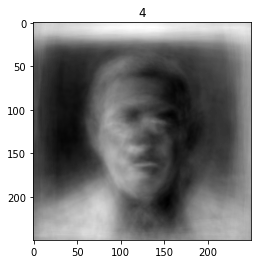

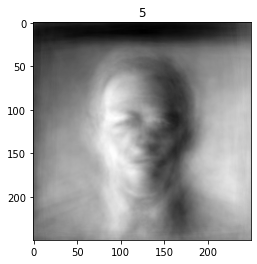

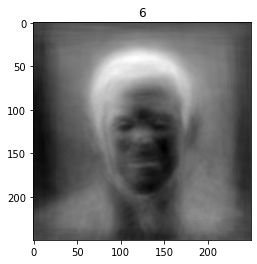

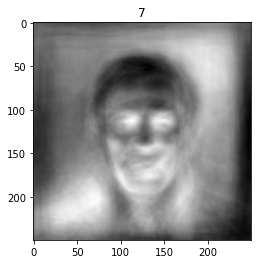

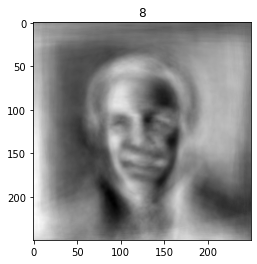

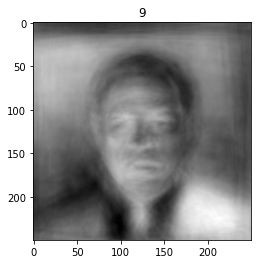

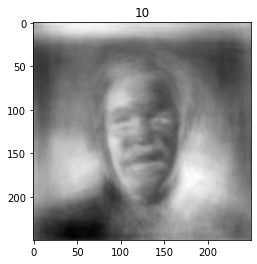

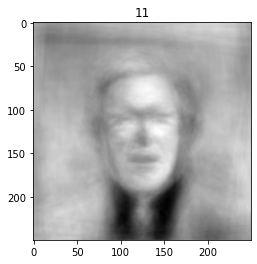

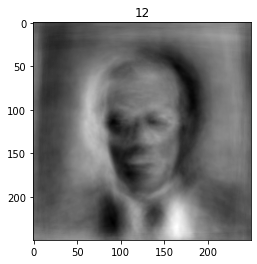

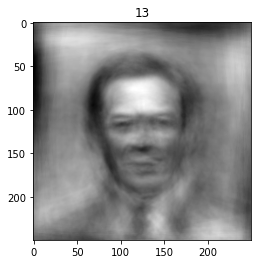

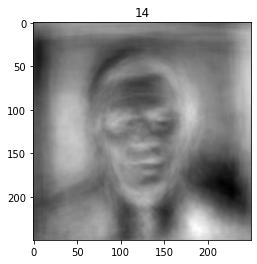

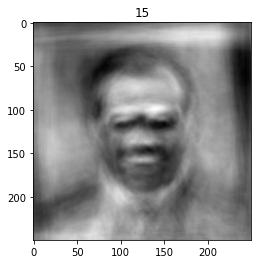

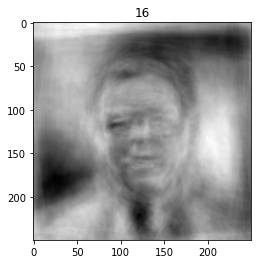

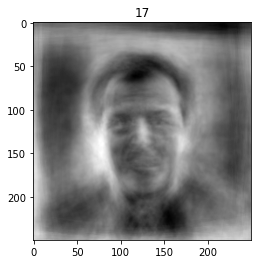

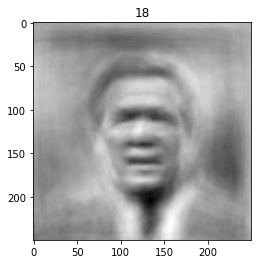

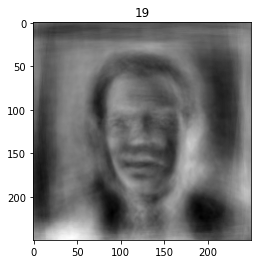

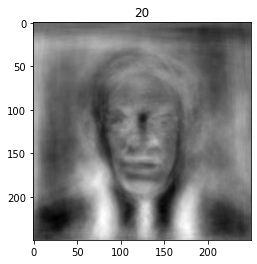

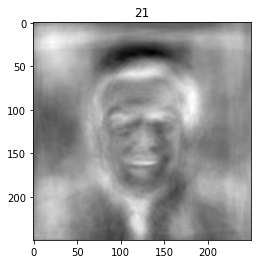

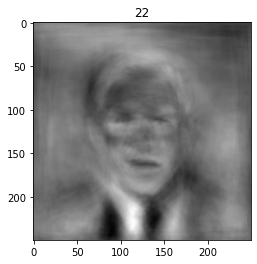

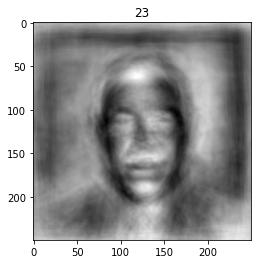

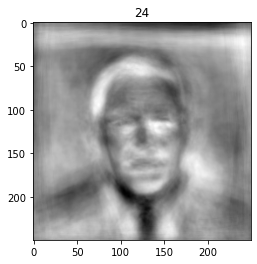

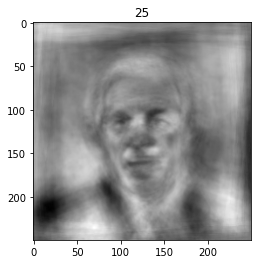

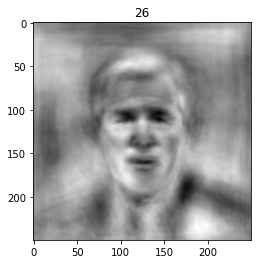

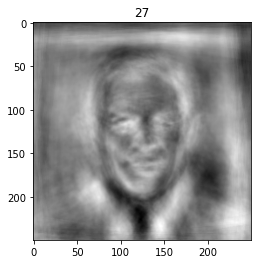

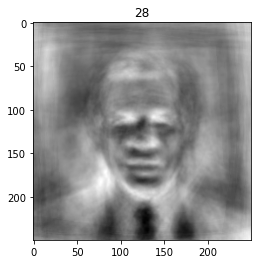

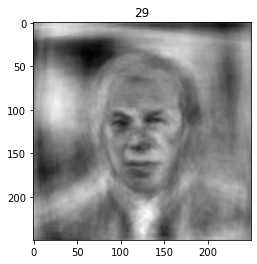

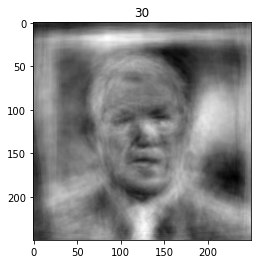

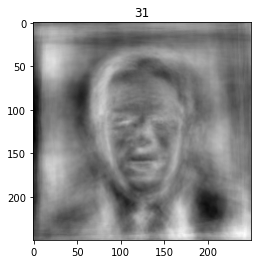

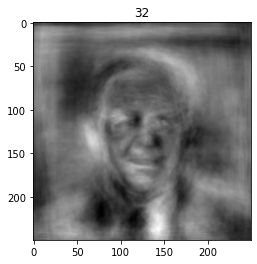

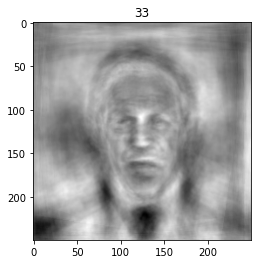

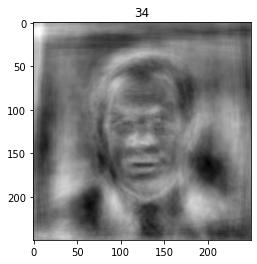

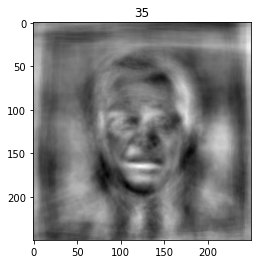

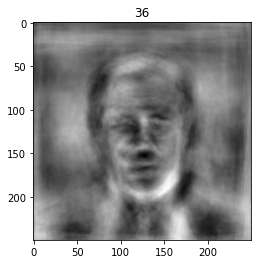

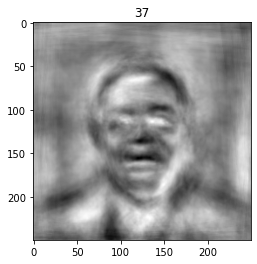

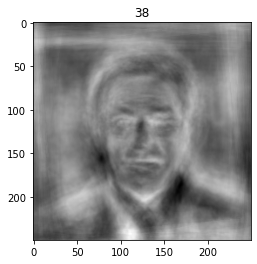

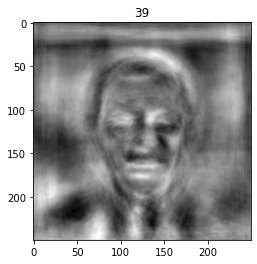

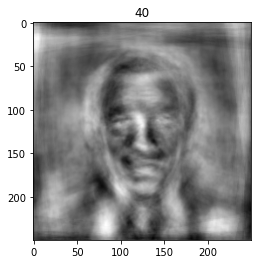

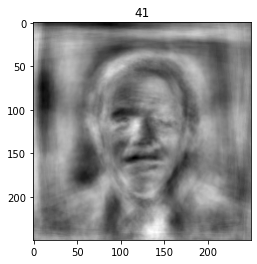

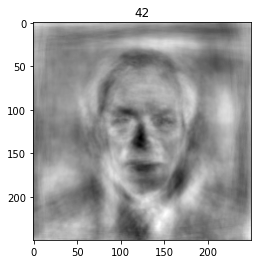

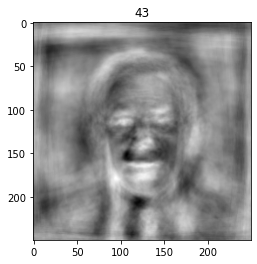

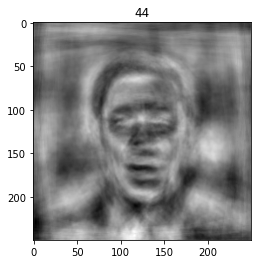

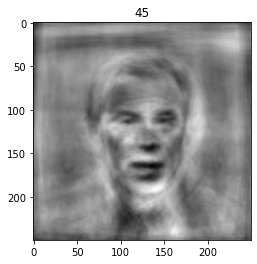

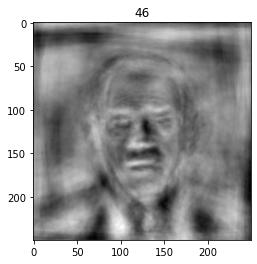

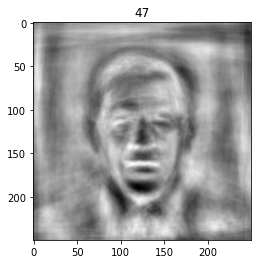

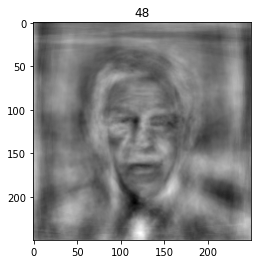

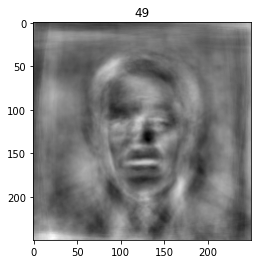

In [14]:
# visualize the images corresponding to the top eigenvectors
print(pca.components_.shape)

# Google "Subplots in Matplotlib" ---> https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

for i in range(pca.components_.shape[0]):

  fig = plt.figure(i)
  
  im = np.reshape(pca.components_[i,:],(250,250))
  plt.imshow(im, cmap=plt.get_cmap('gray'))
  plt.title(str(i))

plt.show()

In [15]:
# project X to the 50 dim space
data_50 = pca.transform(data_scaled)
print(data_50.shape)

(1140, 50)


In [16]:
# 2-dim embeddings
pca.n_components = 2;
print(pca)

data_2 = pca.fit_transform(data_scaled)
print(data_2.shape)

PCA(n_components=2)
(1140, 2)


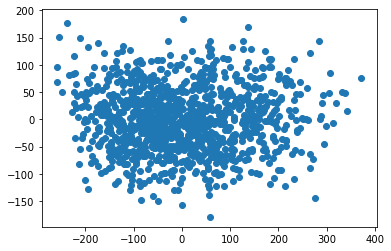

In [17]:

plt.scatter(data_2[:,0],data_2[:,1]) #https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()

# can't make much sense of what is happening

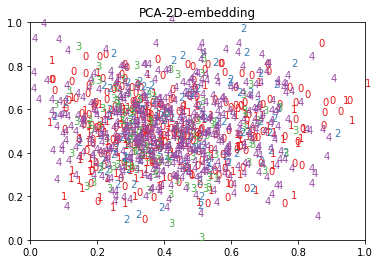

In [18]:
#Plot each 2D point with the correspodning label

# BAsed on https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
# Made  modifications to above code

def plot_embedding(X, y, title=None):
    # min-max scaling
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),color=plt.cm.Set1(y[i] / 10.),)

    if title is not None:
        plt.title(title)
    plt.show()

plot_embedding(data_2, labels, "PCA-2D-embedding")

Q. What can we use the PCA output here for?

- Refer: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

### t-SNE
- Can t-SNE based 2D-viz help us here?
- t-SNE actively tries to find a good  embedding 

In [ ]:
# Load data from SKLearn datasets
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people

from sklearn.datasets import fetch_lfw_people
D = fetch_lfw_people(min_faces_per_person=100) 
print(type(D))

# Code example: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py


<class 'sklearn.utils.Bunch'>


In [ ]:
print((D.data).shape)

(1140, 2914)


In [ ]:
n, h, w = D.images.shape
print(n,h,w)

1140 62 47


In [ ]:
X = preprocessing.scale(D.data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [ ]:
print(X.shape)

(1140, 2914)


In [ ]:
y = D.target  
print(y.shape)

(1140,)


In [ ]:
(unique, counts) = np.unique(y, return_counts=True) # https://kite.com/python/answers/how-to-count-frequency-of-unique-values-in-a-numpy-array-in-python
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[  0 236]
 [  1 121]
 [  2 530]
 [  3 109]
 [  4 144]]


In [ ]:
#Example: https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
import time
from sklearn import manifold


tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)


17.51780104637146


In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, n_jobs=-1)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

14.76901650428772


In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, n_jobs=5)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

14.004982709884644


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multihit
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, n_jobs=12)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

13.900596857070923


In [ ]:
# https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
# Made  modifications to above code
# Scale and visualize the embedding vectors

def plot_embedding(X, y, title=None):
    # min-max scaling
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),color=plt.cm.Set1(y[i] / 10.),)

    if title is not None:
        plt.title(title)
    plt.show()

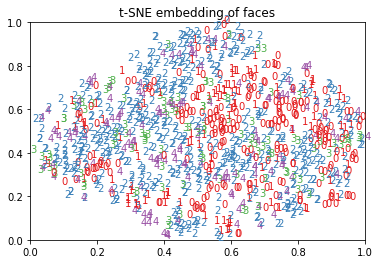

In [ ]:
plot_embedding(X_tsne, y,"t-SNE embedding of faces" )

#### **Assignment:** try various hyper-params (like perplexity, #iter, ) as discussed in the course vidoes

**Summary:**
-  Decent result. Better than PCA.
-  Far from ideal as faces are complex data-points and we humans have evolved to distinguish them over a million years
- We are compeletely ignoring the spatial-properties of images in our system.
- Convolution operations used in CNN solve this. We will learn it in DeepLearning.
- Future Sessions, where we will improve this: DeepLearning based Conv-Autoencoders, Siamese networks, FaceNet etc.